In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [3]:
data = pd.read_csv("TSLA.csv")
data = data.iloc[:, 1:]

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2222,235.860001,243.979996,232.169998,241.470001,241.470001,16714500
2223,242.059998,244.210007,237.000000,238.690002,238.690002,9464600
2224,238.850006,240.000000,231.500000,234.009995,234.009995,10704400
2225,245.520004,247.130005,237.720001,244.100006,244.100006,18159300


In [5]:
minmax_scaler = MinMaxScaler() 
data = minmax_scaler.fit_transform(data)
# turns data into gaussian distribution better for neural networks when data is normalized

In [6]:
data

array([[0.00771826, 0.02244089, 0.00702583, 0.02191224, 0.02191224,
        0.50337694],
       [0.02604237, 0.0369725 , 0.02283393, 0.02174973, 0.02174973,
        0.46074816],
       [0.02391041, 0.02490751, 0.01451821, 0.01668472, 0.01668472,
        0.21865873],
       ...,
       [0.60102552, 0.59887932, 0.59423113, 0.59103466, 0.59103466,
        0.28575478],
       [0.61902578, 0.61799564, 0.61130169, 0.61836405, 0.61836405,
        0.48699164],
       [0.61454595, 0.6434125 , 0.62713725, 0.64796858, 0.64796858,
        0.63648388]])

In [7]:
seq_length = 5
x_data = []
for i in range(seq_length, len(data)): 
    x_data.append(data[i-seq_length:i])
    
print(x_data[1])

[[0.02604237 0.0369725  0.02283393 0.02174973 0.02174973 0.46074816]
 [0.02391041 0.02490751 0.01451821 0.01668472 0.01668472 0.21865873]
 [0.01851302 0.01734678 0.01023684 0.0092091  0.0092091  0.13554449]
 [0.01041695 0.00903534 0.00233279 0.00083966 0.00083966 0.18216567]
 [0.00070166 0.         0.         0.         0.         0.18364493]
 [0.         0.00238619 0.00161923 0.00449621 0.00449621 0.20496202]
 [0.00388612 0.00340501 0.0043088  0.00433369 0.00433369 0.10614273]
 [0.00488464 0.0038608  0.00554382 0.0033857  0.0033857  0.0562553 ]
 [0.00337336 0.00538903 0.00526937 0.00633803 0.00633803 0.06914759]
 [0.00485765 0.00943751 0.00762961 0.01094258 0.01094258 0.11004605]
 [0.01025503 0.013057   0.01103274 0.011078   0.011078   0.09775303]
 [0.01230604 0.01252078 0.01391442 0.01310942 0.01310942 0.06756034]
 [0.01411416 0.01506784 0.01630211 0.0165493  0.0165493  0.06392157]
 [0.01540953 0.01399539 0.01391442 0.01218851 0.01218851 0.0460732 ]
 [0.01219809 0.01144834 0.01240497

In [8]:
x_data = np.array(x_data)
test_set_size = int(np.round(0.15 * x_data.shape[0]))
print(test_set_size)
train_set_size = x_data.shape[0] - (test_set_size)
print(train_set_size)

x_train = x_data[:train_set_size,:-1]
y_train = x_data[:train_set_size, 1, 1]
y_train = y_train.reshape(-1,1)
for i in y_train:
    if i == 1:
        print(i)
        
x_test = x_data[train_set_size:, :-1]
y_test = x_data[train_set_size:, 1, 1]
y_test = y_test.reshape(-1,1)

332
1880


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 100, return_sequences = True, input_shape = (x_train[0].shape)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])


In [10]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = "min" ,patience=7)
model.fit(x_train, y_train, epochs=30, batch_size = 64, validation_split=0.1)

Epoch 1/80
27/27 [==============================] - 5s 52ms/step - loss: 0.0217 - accuracy: 5.9102e-04 - val_loss: 0.0023 - val_accuracy: 0.0053
Epoch 2/80
27/27 [==============================] - 1s 20ms/step - loss: 0.0023 - accuracy: 5.9102e-04 - val_loss: 0.0094 - val_accuracy: 0.0053
Epoch 3/80
27/27 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 5.9102e-04 - val_loss: 0.0042 - val_accuracy: 0.0053
Epoch 4/80
27/27 [==============================] - 1s 19ms/step - loss: 0.0016 - accuracy: 5.9102e-04 - val_loss: 0.0046 - val_accuracy: 0.0053
Epoch 5/80
27/27 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 5.9102e-04 - val_loss: 0.0029 - val_accuracy: 0.0053
Epoch 6/80
27/27 [==============================] - 0s 18ms/step - loss: 0.0015 - accuracy: 5.9102e-04 - val_loss: 0.0031 - val_accuracy: 0.0053
Epoch 7/80
27/27 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 5.9102e-04 - val_loss: 0.0046 - val_ac

27/27 [==============================] - 1s 21ms/step - loss: 5.7376e-04 - accuracy: 5.9102e-04 - val_loss: 0.0050 - val_accuracy: 0.0053
Epoch 57/80
27/27 [==============================] - 1s 21ms/step - loss: 5.9952e-04 - accuracy: 5.9102e-04 - val_loss: 0.0047 - val_accuracy: 0.0053
Epoch 58/80
27/27 [==============================] - 1s 21ms/step - loss: 5.9019e-04 - accuracy: 5.9102e-04 - val_loss: 0.0038 - val_accuracy: 0.0053
Epoch 59/80
27/27 [==============================] - 1s 21ms/step - loss: 6.4656e-04 - accuracy: 5.9102e-04 - val_loss: 0.0015 - val_accuracy: 0.0053
Epoch 60/80
27/27 [==============================] - 1s 21ms/step - loss: 5.7970e-04 - accuracy: 5.9102e-04 - val_loss: 0.0041 - val_accuracy: 0.0053
Epoch 61/80
27/27 [==============================] - 1s 22ms/step - loss: 6.1735e-04 - accuracy: 5.9102e-04 - val_loss: 0.0050 - val_accuracy: 0.0053
Epoch 62/80
27/27 [==============================] - 1s 22ms/step - loss: 5.2415e-04 - accuracy: 5.9102e-04 - va

In [11]:
y_predict = model.predict(x_test)

In [12]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.0000e+00


[0.006546690594404936, 0.0]

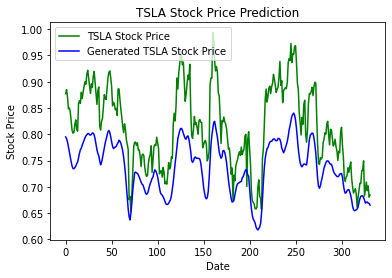

In [13]:
plt.plot(y_test, color = 'green', label = 'TSLA Stock Price')
plt.plot(y_predict, color = 'blue', label = 'Generated TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
tf.constant(["ROMEO:"]).shape

TensorShape([1])